In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 39 (delta 8), reused 5 (delta 5), pack-reused 25
Receiving objects: 100% (39/39), 177.08 MiB | 24.54 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (13/13), done.
PubMed_200k_RCT				       PubMed_20k_RCT_numbers_replaced_with_at_sign
PubMed_200k_RCT_numbers_replaced_with_at_sign  README.md
PubMed_20k_RCT


In [ ]:
!ls pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/

dev.txt  test.txt  train.txt


In [ ]:
data_dir="/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [ ]:
import os
filenames=[data_dir+filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [ ]:
def get_lines(filename):

  with open(filename,'r') as f:
    return f.readlines()

In [ ]:
train_lines=get_lines(data_dir+"train.txt")
train_lines[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

Structure for the data
```
[{'line_number:0,
  'target':'BACKGROUND',
  'text':"Emotional eating is associated with overeating and the development of obesity",
  'total_lines':11},
  ...]
```

In [ ]:
def preprocess_text_with_line_numbers(filename):

  input_lines=get_lines(filename)
  abstract_lines=""
  abstract_sample=[]

  for line in input_lines:
    if line.startswith("###"):
      abstract_id=line
      abstract_lines=""

    elif line.isspace():
      abstract_line_split=abstract_lines.splitlines()

      for abstract_line_number,abstract_line in enumerate(abstract_line_split):
        line_data={}
        target_text_split=abstract_line.split("\t")

        line_data['target']=target_text_split[0]
        line_data['text']=target_text_split[1].lower()
        line_data['line_number']=abstract_line_number
        line_data['total_lines']=len(abstract_line_split) - 1

        abstract_sample.append(line_data)
    else:
      abstract_lines+=line

  return abstract_sample



In [ ]:
train_lines[:5]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n']

In [ ]:
train_samples=preprocess_text_with_line_numbers(data_dir+"train.txt")
val_samples=preprocess_text_with_line_numbers(data_dir+"dev.txt")
test_samples=preprocess_text_with_line_numbers(data_dir+"test.txt")

In [ ]:
len(train_samples),len(val_samples),len(test_samples)

(180040, 30212, 30135)

In [ ]:
import pandas as pd

In [ ]:
train_df=pd.DataFrame(train_samples)
val_df=pd.DataFrame(val_samples)
test_df=pd.DataFrame(test_samples)
train_df[:15]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [ ]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<Axes: ylabel='Frequency'>

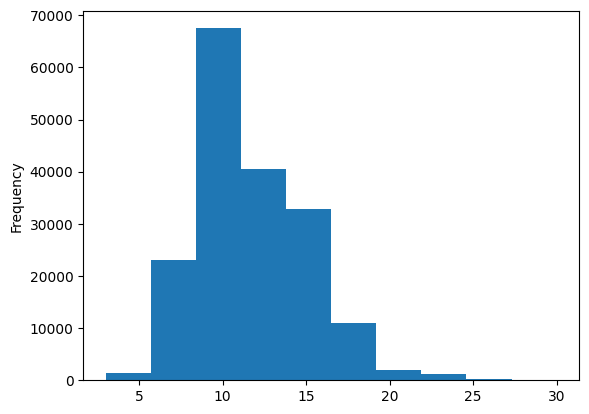

In [ ]:
train_df.total_lines.plot.hist()

### Get lists of sentences

In [ ]:
train_sentences=train_df['text'].to_list()
val_sentences=val_df['text'].to_list()
test_sentences=test_df['text'].to_list()
train_sentences[:10]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

### Make numeric lables (ML models require numeric labels)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot=one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import tensorflow as tf
tf.constant(train_labels_one_hot)

<tf.Tensor: shape=(180040, 5), dtype=float64, numpy=
array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])>

### Label Encode labels

In [ ]:
# Extract labels('target' column) and encode them into integers
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(train_df['target'].to_numpy())
val_labels_encoded=label_encoder.transform(val_df['target'].to_numpy())
test_labels_encoded=label_encoder.transform(test_df['target'].to_numpy())
train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [ ]:
num_classes=len(label_encoder.classes_)
class_names=label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

### Model 0 : baseline (naive bayes text classification with tf-idf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


model_0=Pipeline([
    ("tfidf",TfidfVectorizer()),
     ('clf',MultinomialNB())
])
model_0.fit(train_sentences,train_labels_encoded)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score=model_0.score(val_sentences,val_labels_encoded)
print(f"Our baseline model achieves an accuracy of :{baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of :72.18%


In [ ]:
baseline_preds=model_0.predict(val_sentences)
baseline_preds[:20]

array([4, 1, 3, 2, 2, 2, 2, 2, 4, 4, 0, 4, 1, 1, 2, 2, 4, 1, 4, 4])

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculate_results(y_true,y_pred):

  model_accuracy=accuracy_score(y_true,y_pred)*100

  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')

  model_results={'accuracy':model_accuracy,
                 'precision':model_precision,
                 'recall':model_recall,
                 'f1':model_f1}
  return model_results

In [ ]:
baseline_results=calculate_results(val_labels_encoded,
                                   baseline_preds
                                   )
baseline_results

{'accuracy': 72.1832384482987,
 'precision': 0.7186466952323352,
 'recall': 0.7218323844829869,
 'f1': 0.6989250353450294}

### Text Vectorization (tokenization)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

text_vectorizer=TextVectorization(max_tokens=None,
                                  standardize='lower_and_strip_punctuation',
                                  split='whitespace',
                                  ngrams=None,
                                  output_mode='int',
                                  output_sequence_length=None)

In [ ]:
round((sum([len(i.split()) for i in train_sentences]))/len(train_sentences))

26

In [ ]:
max_vocab_length=68000
max_length=55

text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode='int',
                                  output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
random_sentence=random.choice(train_sentences)
print(f"Original Text:\n{random_sentence}\
      \n\n Vectorized Version of Text:")
text_vectorizer([random_sentence])

Original Text:
the one subject who did not complete the study did so for reasons unrelated to the study or products used .      

 Vectorized Version of Text:


<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[   2,   88, 1567,   67,  112,   31,  488,    2,   17,  112, 1365,
          11, 2312, 3294,    6,    2,   17,   16, 1703,   98,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])>

In [ ]:
rct_20k_text_vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocab:{len(rct_20k_text_vocab)}")

Number of words in vocab:64841


### Creating an embedding using embedding layer

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
token_embed=layers.Embedding(input_dim=len(rct_20k_text_vocab),
                           output_dim=128,
                           embeddings_initializer='uniform',
                           input_length=max_length,
                           name='embedding_1')
token_embed

In [ ]:
random_sentence=random.choice(train_sentences)
print(f'Original sentence:\n{random_sentence}\n\
      \n\nEmbedded Sentence:')
sample_embed=token_embed(text_vectorizer([random_sentence]))
sample_embed

Original sentence:
early supplementation of enteral ml and fo to premature infants with an enterostomy increased dietary protein absorption , intestinal rna , protein and n-@ epa content without altering other fa content .
      

Embedded Sentence:


<tf.Tensor: shape=(1, 55, 128), dtype=float32, numpy=
array([[[ 0.04214731, -0.00433079, -0.03066005, ..., -0.04407779,
          0.04379207, -0.02841923],
        [ 0.03677538,  0.0486888 , -0.0115239 , ..., -0.03495695,
         -0.04479466, -0.010386  ],
        [-0.04738635, -0.04079632, -0.02454302, ..., -0.02661357,
          0.00894412,  0.04725682],
        ...,
        [-0.02164217, -0.03443869, -0.03762767, ...,  0.00467585,
         -0.00673243, -0.02545104],
        [-0.02164217, -0.03443869, -0.03762767, ...,  0.00467585,
         -0.00673243, -0.02545104],
        [-0.02164217, -0.03443869, -0.03762767, ...,  0.00467585,
         -0.00673243, -0.02545104]]], dtype=float32)>

In [ ]:
sample_embed[0][0],sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.04214731, -0.00433079, -0.03066005,  0.0299448 , -0.014991  ,
        -0.02556324,  0.03386464,  0.03825546,  0.03456824, -0.00070305,
        -0.0106337 , -0.02149333,  0.02568901,  0.04849778, -0.04182315,
         0.01326176,  0.04267958,  0.0171638 , -0.00299848, -0.01468147,
         0.02979422,  0.02594997, -0.01847594,  0.02151373,  0.02164358,
         0.04441421,  0.01095679, -0.02608485, -0.02728972, -0.01261396,
         0.04047641, -0.01205909,  0.0175264 ,  0.04950741,  0.03748211,
         0.00222791,  0.02501624, -0.02497442, -0.03417852,  0.04589104,
         0.03386685,  0.02363484, -0.04053631, -0.01227262, -0.03555083,
        -0.02191759, -0.01455164, -0.04624523, -0.01665699, -0.00837978,
         0.02949442, -0.03153618, -0.03421751, -0.01458118, -0.04114618,
        -0.04758419, -0.03880256, -0.03493688,  0.03355828, -0.02339035,
         0.0434022 , -0.0239555 ,  0.0462541 ,  0.03338236, -0.03068428,
  

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
val_dataset=tf.data.Dataset.from_tensor_slices((val_sentences,val_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

In [ ]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [ ]:
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset=val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Model 1: Conv1 with token embedding

In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vectors=text_vectorizer(inputs)
token_embeddings=token_embed(text_vectors)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(token_embeddings)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)

model_1=tf.keras.Model(inputs,outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 55)                0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 55, 128)           8299648   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            41024     
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 5)                 325   

In [ ]:
val_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
history_model_1=model_1.fit(train_dataset,
                            epochs=3,
                            steps_per_epoch=0.1*len(train_dataset),
                            validation_data=val_dataset,
                            validation_steps=0.1*len(val_dataset))

Epoch 1/3
562/562 [==============================] - 75s 131ms/step - loss: 0.9120 - accuracy: 0.6431 - val_loss: 0.6864 - val_accuracy: 0.7411
Epoch 2/3
562/562 [==============================] - 72s 128ms/step - loss: 0.6550 - accuracy: 0.7586 - val_loss: 0.6314 - val_accuracy: 0.7688
Epoch 3/3
562/562 [==============================] - 73s 129ms/step - loss: 0.6169 - accuracy: 0.7759 - val_loss: 0.5951 - val_accuracy: 0.7842


In [ ]:
model_1.evaluate(val_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.5953 - accuracy: 0.7867


[0.5952844619750977, 0.7867072820663452]

In [ ]:
model_1_pred_probs=model_1.predict(val_dataset)
model_1_pred_probs

945/945 [==============================] - 6s 6ms/step


array([[4.07441676e-01, 1.59828946e-01, 9.94521827e-02, 3.01757336e-01,
        3.15198191e-02],
       [4.69626784e-01, 2.49145821e-01, 1.30496807e-02, 2.61016458e-01,
        7.16119166e-03],
       [1.24133304e-01, 7.75783835e-03, 1.32740207e-03, 8.66697490e-01,
        8.40268258e-05],
       ...,
       [3.80268921e-06, 8.95287027e-04, 6.00697880e-04, 2.97501742e-06,
        9.98497248e-01],
       [6.62158057e-02, 4.30537045e-01, 1.18534200e-01, 9.48785469e-02,
        2.89834380e-01],
       [1.76679507e-01, 6.94207489e-01, 3.82353775e-02, 2.78587285e-02,
        6.30188286e-02]], dtype=float32)

In [ ]:
model_1_preds=tf.argmax(model_1_pred_probs,axis=1)
model_1_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [ ]:
model_1_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_1_preds)
model_1_results

{'accuracy': 78.67072686349795,
 'precision': 0.783629971207998,
 'recall': 0.7867072686349795,
 'f1': 0.7843066379097107}

### Model 2:Feature Extraction with pretrained token embedding


In [ ]:
train_sentences

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .',
 'serum levels of interleukin @ ( il-@ ) , il-@ , tumor necrosis factor ( tnf ) - , and high-sensitivity c-reactive protein ( hscrp ) were measured .',
 'there was a clinic

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-26 06:01:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-26 06:01:39 (97.4 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback

In [ ]:
import tensorflow_hub as hub

tf_hub_embedding_layer=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                      input_shape=[],
                                      trainable=False,
                                      dtype=tf.string,
                                      name='USE')

In [ ]:
random_train_sentence=random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embed_sentence=tf_hub_embedding_layer([random_train_sentence])
use_embed_sentence

Random sentence:
 baseline , discharge , and change in renal function were associated with @-day mortality or rehospitalization for heart failure .


<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 9.16565489e-03, -1.68393981e-02, -4.99853157e-02,
         7.82494340e-03,  3.24145518e-02, -7.86465630e-02,
         3.78119834e-02, -2.73545422e-02,  3.22036333e-02,
         2.45247898e-03,  9.03863907e-02,  6.49837926e-02,
        -4.49856371e-02, -5.63248359e-02,  4.21939678e-02,
        -6.56256303e-02, -9.03765187e-02,  6.08600862e-02,
         7.10306410e-03,  6.16219230e-02,  7.29348958e-02,
         5.98876998e-02,  6.89629838e-02,  8.85615777e-03,
         5.98081537e-02,  3.16717691e-04,  3.51736732e-02,
         5.16396612e-02, -7.62219280e-02, -4.06582616e-02,
         3.58364768e-02,  8.96947235e-02,  1.00234700e-02,
         7.23350719e-02, -2.70287842e-02, -7.84901977e-02,
        -3.47775780e-02, -5.66381887e-02,  3.75582743e-03,
         4.03674245e-02,  4.39509675e-02, -4.61680889e-02,
        -8.14710744e-03, -2.38147136e-02, -1.83957852e-02,
         2.66152192e-02,  1.29346959e-02,  5.61623685e-02,
      

In [ ]:
model_2=tf.keras.Sequential([
    tf_hub_embedding_layer,
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,activation='softmax')
],name='model_2_USE')
model_2.summary()

Model: "model_2_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 256864133 (979.86 MB)
Trainable params: 66309 (259.02 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [ ]:
SAVE_DIR='model_logs'

In [ ]:
model_2_history=model_2.fit(train_dataset,
                            epochs=5,
                            steps_per_epoch=(0.1*len(train_dataset)),
                            validation_data=val_dataset,
                            validation_steps=(0.1*len(val_dataset)),
                            callbacks=create_tensorboard_callback(SAVE_DIR,
                                                                  'tf_hub_sentence_encoder'))

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240226-060210
Epoch 1/5
562/562 [==============================] - 13s 17ms/step - loss: 0.9114 - accuracy: 0.6539 - val_loss: 0.8026 - val_accuracy: 0.6872
Epoch 2/5
562/562 [==============================] - 10s 17ms/step - loss: 0.7683 - accuracy: 0.7029 - val_loss: 0.7584 - val_accuracy: 0.7023
Epoch 3/5
562/562 [==============================] - 9s 16ms/step - loss: 0.7505 - accuracy: 0.7121 - val_loss: 0.7423 - val_accuracy: 0.7105
Epoch 4/5
562/562 [==============================] - 8s 15ms/step - loss: 0.7196 - accuracy: 0.7233 - val_loss: 0.7146 - val_accuracy: 0.7250
Epoch 5/5
562/562 [==============================] - 11s 20ms/step - loss: 0.7253 - accuracy: 0.7212 - val_loss: 0.6950 - val_accuracy: 0.7332


In [ ]:
model_2_pred_probs=model_2.predict(val_sentences)
model_2_pred_probs[:2]

945/945 [==============================] - 12s 12ms/step


array([[0.6304002 , 0.24608588, 0.0029147 , 0.10902718, 0.01157203],
       [0.43585208, 0.46334198, 0.00638736, 0.09211046, 0.00230803]],
      dtype=float32)

In [ ]:
model_2_preds=tf.argmax(model_2_pred_probs,axis=1)
model_2_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 2, 2])>

In [ ]:
def calculate_results(y_true,y_pred):
  """
  Calculates model accuracy,precision,recall,f1-score of a binary classification mdoel.
  """
  # Calculate the accuracy
  model_accuracy=accuracy_score(y_true,y_pred)*100

  # Calculate the precision,recall,f1_score using "weighted" average
  model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_pred,average='weighted')

  model_results={'accuracy':model_accuracy,
                 "precision":model_precision,
                 'recall':model_recall,
                 'f1':model_f1}
  return model_results

In [ ]:
model_2_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_2_preds)
model_2_results

{'accuracy': 73.36819806699324,
 'precision': 0.7305798181382394,
 'recall': 0.7336819806699325,
 'f1': 0.7283024223297443}

### Model 3: Conv1D with character embeddings

### Creating character-level tokenizer

In [ ]:
def split_chars(text):
  return " ".join(list(text))

In [ ]:
split_chars(random_train_sentence)

'b a s e l i n e   ,   d i s c h a r g e   ,   a n d   c h a n g e   i n   r e n a l   f u n c t i o n   w e r e   a s s o c i a t e d   w i t h   @ - d a y   m o r t a l i t y   o r   r e h o s p i t a l i z a t i o n   f o r   h e a r t   f a i l u r e   .'

In [ ]:
train_chars=[split_chars(sentence) for sentence in train_sentences]
val_chars=[split_chars(sentence) for sentence in val_sentences]
test_chars=[split_chars(sentence) for sentence in test_sentences]
train_chars[:1],val_chars[:1],test_chars[:1]

(['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .'],
 ['i g e   s e n s i t i z a t i o n   t o   a s p e r g i l l u s   f u m i g a t u s   a n d   a   p o s i t i v e   s p u t u m   f u n g a l   c u l t u r e   r e s u l t   a r e   c o m m o n   i n   p a t i e n t s   w i t h   r e f r a c t o r y   a s t h m a   .'],
 ['t h i s   s t u d y   a n a l y z e d   l i v e r   f u n c t i o n   a b n o r m a l i t i e s   i n   h e a r t   f a i l u r e   p a t i e n t s   a d m

In [ ]:
import numpy as np

In [ ]:
char_lens=[len(sentence) for sentence in train_sentences]
mean_char_lens=np.mean(char_lens)
mean_char_lens

149.3662574983337

In [ ]:
output_seq_char_len=int(np.percentile(char_lens,95))
output_seq_char_len

290

In [ ]:
import string
alphabet=string.ascii_lowercase+string.digits+string.punctuation

In [ ]:
NUM_CHAR_TOKENS=len(alphabet)+2
char_vectorizer=TextVectorization(max_tokens=NUM_CHAR_TOKENS,
                                  output_sequence_length=output_seq_char_len,
                                  # standardize=None,
                                  name='char_vectorizer')

In [ ]:
char_vectorizer.adapt(train_chars)

In [ ]:
char_vocab=char_vectorizer.get_vocabulary()
print(f'Number of different characters in character vocab:{len(char_vocab)}')
print(f'5 most common characters:{char_vocab[:5]}')
print(f'5 least common characters:{char_vocab[-5:]}')

Number of different characters in character vocab:28
5 most common characters:['', '[UNK]', 'e', 't', 'i']
5 least common characters:['k', 'x', 'z', 'q', 'j']


In [ ]:
random_train_chars=random.choice(train_chars)
print(f'Charified text:\n {random_train_chars}')
print(f'Length of random_train_chars :{len(random_train_chars)}')

Charified text:
 (   c l i n i c a l t r i a l s . g o v   n u m b e r   ,   n c t @   .   )
Length of random_train_chars :75


In [ ]:
vectorized_chars=char_vectorizer([random_train_chars])
print(f"\n Vectorized_chars:\n {vectorized_chars}")
print(f'\n Length of vectorized chars: {len(vectorized_chars)}')


 Vectorized_chars:
 [[11 12  4  6  4 11  5 12  3  8  4  5 12  9 18  7 21  6 16 15 22  2  8  6
  11  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0]]

 Length of vectorized chars: 1


### Creating a character-level embedding

In [ ]:
from tensorflow.keras import layers
char_embed=layers.Embedding(input_dim=len(char_vocab),
                            output_dim=25,
                            mask_zero=True,
                            name='char_embed')
char_embed

In [ ]:
print(f"Charified text:\n{random_train_chars}\n")
char_embed_example=char_embed(char_vectorizer([random_train_chars]))
print(f"Embedd chars. (after vectorization and embedding):\n {char_embed_example}\n")
print(f'Char embed shape:{char_embed_example.shape}')

Charified text:
(   c l i n i c a l t r i a l s . g o v   n u m b e r   ,   n c t @   .   )

Embedd chars. (after vectorization and embedding):
 [[[-0.02949653  0.02171942 -0.0342251  ...  0.04920575  0.03256614
    0.02169831]
  [-0.03344937  0.01949069 -0.04688866 ... -0.03549565 -0.01787458
   -0.0497462 ]
  [-0.00716114 -0.01843367  0.03710211 ... -0.02631853 -0.02801609
   -0.03457531]
  ...
  [-0.04046383  0.04370305 -0.04186685 ...  0.04713598 -0.00205598
    0.04900939]
  [-0.04046383  0.04370305 -0.04186685 ...  0.04713598 -0.00205598
    0.04900939]
  [-0.04046383  0.04370305 -0.04186685 ...  0.04713598 -0.00205598
    0.04900939]]]

Char embed shape:(1, 290, 25)


In [ ]:
inputs=layers.Input(shape=(1,),dtype=tf.string)
char_vectors=char_vectorizer(inputs)
char_embeddings=char_embed(char_vectors)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(char_embeddings)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_3=tf.keras.Model(inputs,outputs)

model_3.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVecto  (None, 290)               0         
 rization)                                                       
                                                                 
 char_embed (Embedding)      (None, 290, 25)           700       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           8064      
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 5)                 325 

In [ ]:
train_char_datasets=tf.data.Dataset.from_tensor_slices((train_chars,train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_datasets=tf.data.Dataset.from_tensor_slices((val_chars,val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_datasets=tf.data.Dataset.from_tensor_slices((test_chars,test_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
train_char_datasets

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [ ]:
model_3_history=model_3.fit(train_char_datasets,
                            epochs=3,
                            steps_per_epoch=(0.1*len(train_char_datasets)),
                            validation_data=val_char_datasets,
                            validation_steps=(0.1*len(val_char_datasets)))

Epoch 1/3
562/562 [==============================] - 14s 23ms/step - loss: 1.2477 - accuracy: 0.4949 - val_loss: 1.0580 - val_accuracy: 0.5773
Epoch 2/3
562/562 [==============================] - 12s 22ms/step - loss: 1.0125 - accuracy: 0.5948 - val_loss: 0.9622 - val_accuracy: 0.6148
Epoch 3/3
562/562 [==============================] - 12s 22ms/step - loss: 0.9287 - accuracy: 0.6368 - val_loss: 0.8810 - val_accuracy: 0.6572


In [ ]:
model_3_pred_probs=model_3.predict(val_char_datasets)
model_3_pred_probs

945/945 [==============================] - 8s 8ms/step


array([[0.1899602 , 0.40168586, 0.11210395, 0.24500585, 0.05124412],
       [0.23634008, 0.30906942, 0.01988532, 0.40758342, 0.02712178],
       [0.06250016, 0.20517415, 0.38589424, 0.25831482, 0.08811658],
       ...,
       [0.03035246, 0.12119371, 0.12073492, 0.04652167, 0.6811972 ],
       [0.02894267, 0.13964185, 0.31385967, 0.03791636, 0.4796395 ],
       [0.47742617, 0.33213097, 0.09149561, 0.08633088, 0.01261639]],
      dtype=float32)

In [ ]:
model_3_preds=tf.argmax(model_3_pred_probs,axis=1)
model_3_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([1, 3, 2, ..., 4, 4, 0])>

In [ ]:
model_3_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_3_preds)
model_3_results

{'accuracy': 64.90798358268238,
 'precision': 0.6505804154317266,
 'recall': 0.6490798358268238,
 'f1': 0.6364494238585536}

### Model 4: Combining pretrained token embeddings + characters embeddings (hybrid embeddings layer)

1. Create a token-level embedding model (similar `model-1`)
2. Create a char-level embedding model (similar `model-3` with slight modification)
3. Combine 1 & 2 with a concatenate (`layers.Concatenate`)
4. Build a series of output on top of 3
5. Construct a model which takes token and character-level sequence as input and produces sequence label probabilities as outptu

In [ ]:
# 1.token-level embedding model
token_inputs=layers.Input(shape=[],dtype=tf.string,name='token_inputs')
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(inputs=token_inputs,outputs=token_outputs)

# 2.char-level embedding model

char_inputs=layers.Input(shape=(1,),dtype=tf.string,name='char_inputs')
char_vectors=char_vectorizer(char_inputs)
char_embeddings=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddings)

char_model=tf.keras.Model(inputs=char_inputs,
                          outputs=char_bi_lstm)

# 3.Combine token and char inputs (create hybrid embeddings)
token_char_concatenate=layers.Concatenate(name='token_char_hybrid')([token_model.output,char_model.output])


# 4 create output layer - addding in dropout

combined_dropout=layers.Dropout(0.5)(token_char_concatenate)
combined_dense=layers.Dense(128,activation='relu')(combined_dropout)


final_dropout=layers.Dropout(0.5)(combined_dense)
output_layer=layers.Dense(num_classes,activation='softmax')(final_dropout)

# 5.onstruct a model which takes token and character-level sequence as input
model_4=tf.keras.Model(inputs=[token_model.input,char_model.input],
                       outputs=output_layer,name='model_4_token_char_embeddings')


In [ ]:
model_4.summary()

Model: "model_4_token_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 char_inputs (InputLayer)    [(None, 1)]                  0         []                            
                                                                                                  
 token_inputs (InputLayer)   [(None,)]                    0         []                            
                                                                                                  
 char_vectorizer (TextVecto  (None, 290)                  0         ['char_inputs[0][0]']         
 rization)                                                                                        
                                                                                                  
 USE (KerasLayer)            (None, 512)                  2567978   ['

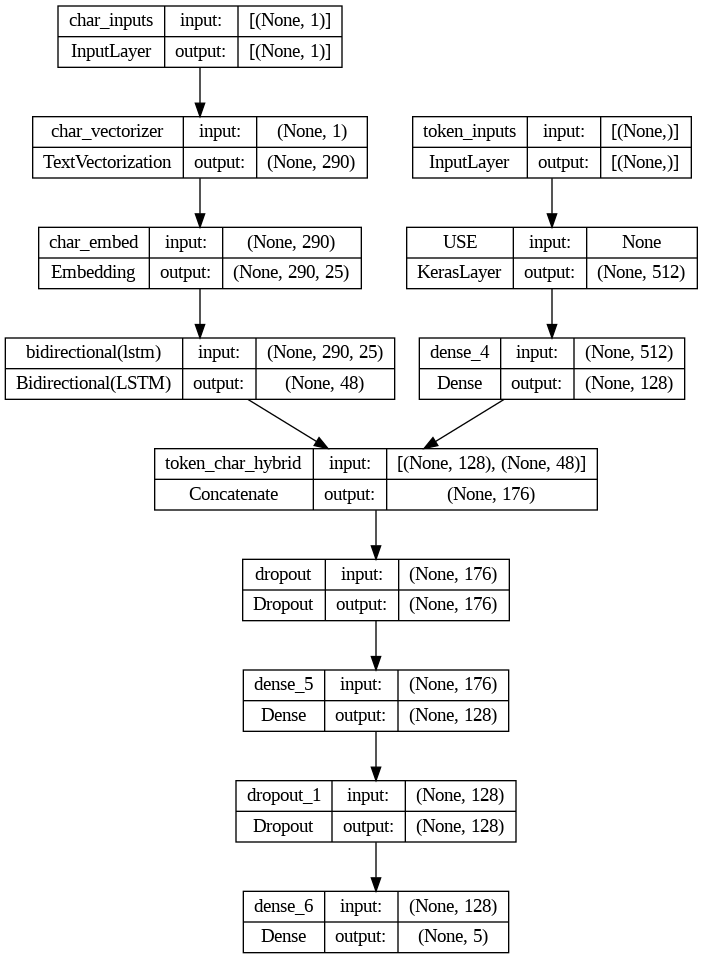

In [ ]:
from keras.utils import plot_model
plot_model(model_4,show_shapes=True)

In [ ]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Combine chars and tokens into a dataset
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))


train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Repeat the above steps for our val data
val_char_token_data=tf.data.Dataset.from_tensor_slices((val_sentences,val_chars))
val_char_token_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset=tf.data.Dataset.zip((val_char_token_data,val_char_token_labels))


val_char_token_dataset=val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Fitting a model on token and character-level sequences

In [ ]:
model_4_history=model_4.fit(train_char_token_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_char_token_dataset)),
                            validation_data=val_char_token_dataset,
                            validation_steps=int(0.1*len(val_char_token_dataset)))


Epoch 1/3
493/562 [=========================>....] - ETA: 19s - loss: 0.9981 - accuracy: 0.6026

KeyboardInterrupt: 

In [ ]:
model_4.evaluate(val_char_token_dataset)

In [ ]:
model_4_pred_probs=model_4.predict(val_char_token_dataset)
model_4_pred_probs

In [ ]:
model_4_preds=tf.argmax(model_4_pred_probs,axis=1)
model_4_preds

In [ ]:
model_4_results=calculate_results(y_true=val_labels_encoded,
                                  y_pred=model_4_preds)
model_4_results

### Model 5: Transfer learning with token embeddings + char embeddings + positional embeddings

#### Create positional embeddings

In [ ]:
train_df['line_number'].value_counts()

In [ ]:
train_df.line_number.plot.hist()

In [ ]:
train_line_numbers_one_hot=tf.one_hot(train_df['line_number'].to_numpy(),depth=15)
val_line_numbers_one_hot=tf.one_hot(val_df['line_number'].to_numpy(),depth=15)
test_line_numbers_one_hot=tf.one_hot(test_df['line_number'].to_numpy(),depth=15)
# val_line_numbers_one_hot[:10],val_line_numbers_one_hot.shape
# train_line_numbers_one_hot[:10],train_line_numbers_one_hot.shape

In [ ]:
train_df['total_lines'].value_counts()

In [ ]:
train_df.total_lines.plot.hist()

In [ ]:
train_total_lines_one_hot=tf.one_hot(train_df['total_lines'].to_numpy(),depth=20)
val_total_lines_one_hot=tf.one_hot(val_df['total_lines'].to_numpy(),depth=20)
test_total_lines_one_hot=tf.one_hot(test_df['total_lines'].to_numpy(),depth=20)

train_total_lines_one_hot,train_total_lines_one_hot.shape

### Building a tribrid embedding model

1. Create a token-level model
2. Create a character-level model
3. Create a model for the `line_number` feature
4. Create a model for the `total_line` feature
5. Combine the output of 1 & 2 using `tf.keras.layers.concatenate`
6. Combine the output of 3,4,5 using `tf.keras.layers.concatenate`
7. Create an output layer to accept the tribrid embedding and output label probabilities
8. Combine the inputs of 1,2,3,4 and outputs of into a tf.keras.Model




In [ ]:
# 1.
token_inputs=layers.Input(shape=[],dtype=tf.string)
token_embeddings=tf_hub_embedding_layer(token_inputs)
token_outputs=layers.Dense(128,activation='relu')(token_embeddings)
token_model=tf.keras.Model(token_inputs,token_outputs)

#2.
char_inputs=layers.Input(shape=(1,),dtype=tf.string,name='char_inputs')
char_vectors=char_vectorizer(char_inputs)
char_embeddding=char_embed(char_vectors)
char_bi_lstm=layers.Bidirectional(layers.LSTM(24))(char_embeddding)
char_model=tf.keras.Model(inputs=char_inputs,outputs=char_bi_lstm)

#3.
line_numbers_inputs=layers.Input(shape=(15,),dtype=tf.float32,name='line_number_input')
line_numbers_dense=layers.Dense(32,activation='relu')(line_numbers_inputs)
line_number_model=tf.keras.Model(line_numbers_inputs,line_numbers_dense)


#4.
total_lines_inputs=layers.Input(shape=(20,),dtype=tf.float32,name='total_line_input')
total_lines_dense=layers.Dense(32,activation='relu')(total_lines_inputs)
total_lines_model=tf.keras.Model(total_lines_inputs,total_lines_dense)


#5.
combined_embeddings=layers.Concatenate(name='char_token_hybrid_embedding')([token_model.output,
                                                                            char_model.output])

z=layers.Dense(256,activation='relu')(combined_embeddings)

z=layers.Dropout(0.5)(z)

#6.
tribrid_embeddings=layers.Concatenate(name='char_token_positional_embedding')([line_number_model.output,
                                                                               total_lines_model.output,
                                                                               z])
#7.
output_layer=layers.Dense(num_classes,activation='softmax',name='output_layer')(tribrid_embeddings)

#8.
model_5=tf.keras.Model(inputs=[line_number_model.input,total_lines_model.input,token_model.input,char_model.input],
                       outputs=output_layer,name='model_5_tribrid_embedding_model')

In [ ]:
model_5.summary()

In [ ]:
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
plot_model(model_5)

### Create tribrid embedding datasets

In [ ]:
train_char_token_data=tf.data.Dataset.from_tensor_slices((train_sentences,train_chars))
train_char_token_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_dataset=tf.data.Dataset.zip((train_char_token_data,train_char_token_labels))


train_char_token_dataset=train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_token_pos_data=tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot,
                                                              train_total_lines_one_hot,
                                                              train_sentences,
                                                              train_chars))
train_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(train_labels_one_hot)
train_char_token_pos_dataset=tf.data.Dataset.zip((train_char_token_pos_data,train_char_token_pos_labels))
train_char_token_pos_dataset=train_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


# Same for val data
val_char_token_pos_data=tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot,
                                                              val_total_lines_one_hot,
                                                              val_sentences,
                                                              val_chars))
val_char_token_pos_labels=tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_pos_dataset=tf.data.Dataset.zip((val_char_token_pos_data,val_char_token_pos_labels))
val_char_token_pos_dataset=val_char_token_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

### Fitting,evaluating and making prediction with our tribrid model

In [ ]:
history_model_5=model_5.fit(train_char_token_pos_dataset,
                            epochs=3,
                            steps_per_epoch=int(0.1*len(train_char_token_pos_dataset)),
                            validation_data=val_char_token_pos_dataset,
                            validation_steps=int(0.1*len(train_char_token_pos_dataset)))
history_model_5

In [ ]:
model_5_pred_probs=model_5.predict(val_char_token_pos_dataset,verbose=1)
model_5_pred_probs

In [ ]:
model_5_preds=tf.argmax(model_5_pred_probs,axis=1)
model_5_preds

In [ ]:
model_5_results=calculate_results(val_labels_encoded,
                                  model_5_preds)
model_5_results

In [ ]:
import pandas as pd

In [ ]:
all_model_results=pd.DataFrame({"model_0_baseline":baseline_results,
                                'model_1_custom_token_embedding':model_1_results,
                                'model_2_pretrained_token_embedding':model_2_results,
                                'model_3_custom_character_embedding':model_3_results,
                                'model_4_hybrid_char_token_embedding':model_4_results,
                                'model_5_pos_char_token_embedding':model_5_results})
all_model_results=all_model_results.transpose()
all_model_results